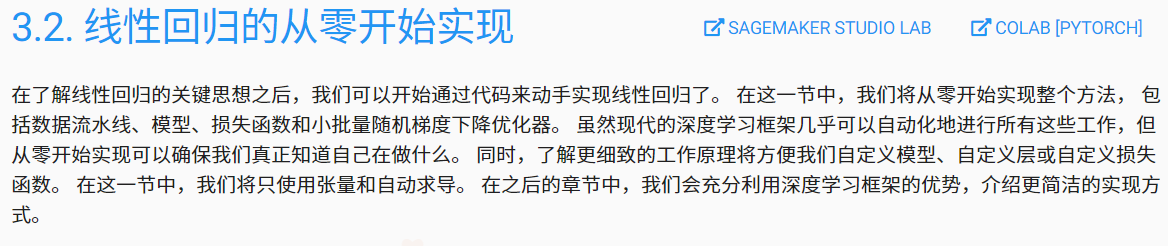

In [1]:
import sys

sys.path.append('../../../../')

In [2]:
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

# 1. 生成数据集

In [3]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([0.44860867 0.70755666], shape=(2,), dtype=float32) 
label: tf.Tensor([2.7044363], shape=(1,), dtype=float32)


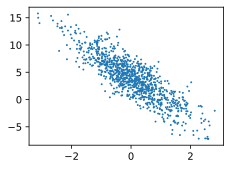

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

# 2. 读取数据集

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[-1.1412532  -1.008859  ]
 [ 1.0694476   1.7324237 ]
 [ 1.2728466   0.16308318]
 [ 0.37071764  1.4097177 ]
 [-1.4407487  -0.8363973 ]
 [-1.3466154  -1.8027594 ]
 [-0.27438977 -0.8292506 ]
 [ 0.87904215  0.39657786]
 [-0.2925424  -0.2731807 ]
 [ 0.79320294 -0.4319055 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[5.343687  ]
 [0.41766006]
 [6.193604  ]
 [0.14674109]
 [4.16805   ]
 [7.627009  ]
 [6.4647694 ]
 [4.611887  ]
 [4.5417113 ]
 [7.2627435 ]], shape=(10, 1), dtype=float32)


# 3. 初始化模型参数

In [8]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

# 4. 定义模型

In [9]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return tf.matmul(X, w) + b

# 5. 定义损失函数

In [10]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

# 6. 定义优化算法

In [11]:
def sgd(params, grads, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

# 7. 训练

In [12]:
lr = 0.01
num_epochs = 20
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 计算l关于[w,b]的梯度
        dw, db = g.gradient(l, [w, b])
        # 使用参数的梯度更新参数
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 2.373577
epoch 2, loss 0.363718
epoch 3, loss 0.055841
epoch 4, loss 0.008619
epoch 5, loss 0.001361
epoch 6, loss 0.000251
epoch 7, loss 0.000081
epoch 8, loss 0.000055
epoch 9, loss 0.000051
epoch 10, loss 0.000050
epoch 11, loss 0.000050
epoch 12, loss 0.000050
epoch 13, loss 0.000050
epoch 14, loss 0.000050
epoch 15, loss 0.000050
epoch 16, loss 0.000050
epoch 17, loss 0.000050
epoch 18, loss 0.000050
epoch 19, loss 0.000050
epoch 20, loss 0.000050


In [13]:
print(f'w的估计误差: {true_w - tf.reshape(w, true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: [0.00083685 0.00025916]
b的估计误差: [0.0002284]
